In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D

import nltk

nltk.download('punkt') 


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
def split_into_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

# Example usage
text = "Hello there Dr. Oitik and M.S.C engineer bro Affif! How are you? I hope you're having a great day."
senten = split_into_sentences(text)
print(senten)

['Hello there Dr. Oitik and M.S.C engineer bro Affif!', 'How are you?', "I hope you're having a great day."]


In [3]:
import string
import re

def remove_noise(sentence):
    '''
    Removes noise from the dataset
    '''
    # Remove punctuation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    # Remove extra spaces and newlines
    sentence = ' '.join(sentence.split())
    return sentence

def make_sentences(content):
    '''
    Takes a full story of a book or Multiple Books
    And convert it into a list of sentences.
    '''
    
    # sentences = nltk.sent_tokenize(content)
    sentences = re.split(r'[.?!:;]', content)

    # Remove any leading/trailing whitespaces from each sentence, remove punctuation and
    # other noise

    # Filter out empty sentences (if any) using the filter function
    sentences = list(filter(None, sentences))
    cleaned_sentences = [remove_noise(sentence) for sentence in sentences if sentence.strip()]

    # Print the list of cleaned sentences
    return cleaned_sentences


def read_stories(paths):
    '''
    Read All the stories from a folder and return an array of sentence.
    '''
    sents = []
    for path in paths:
        # File path with Bengali characters
        file_path_bangla = path
        # Open the file using triple quotes around the file path
        with open(f"""{file_path_bangla}""", 'r', encoding='utf-8') as file:
            content = file.read()
        sent = make_sentences(content)
        sents.append(sent)
    # Convert the 2d array into 1d array
#     ments = [element for row in sents for element in row]
    return sents

In [4]:
paths = []
for dirname, _, filenames in os.walk('/kaggle/input/english-book/Salman_Rushdie_Copy'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        
sentences = read_stories(paths)
len(sentences[1])

15116

In [5]:
lenarr = []
for block in sentences:
    len_ofS = [len(sentence.split()) for sentence in block if len(sentence.split()) != 0]
    lenarr.append(len_ofS)

In [6]:
lenarr[4][:10]

[11, 5, 5, 5, 4, 4, 10, 5, 4, 7]

In [7]:
print(lenarr[4].count(0))

0


### SOME ERRORS THAT I FIND OUT

1. THERE ARE SENTENCES WITH LENGTH 0 
 - REMOVE THEM
2. THERE ARE SENTENCES WITH LENGTH 1, 2, 3
 - MAYBE THEY ARE OUTLIERS DISCUSS WITH `HARUN SIR` AND DECIDE
3. Randomly Check some values

In [8]:
rand_index = np.random.randint(0, len(sentences[0]))
print(f'''Index = {rand_index},  sentence = {sentences[0][rand_index]}, 
length = {len(sentences[0][rand_index].split())}''')

Index = 184,  sentence = The stowaway approached and raised a glass, 
length = 7


In [9]:
c = 0
for val in sentences[0]:
    if len(val.split()) > 100:
        c += 1
print(c)

17


In [10]:
sentences[0][142]

'” Here he plucked a hooded falcon from his breast a falconer’s glove from the empty air and handed both to the astounded laird'

In [11]:
split_into_sentences(sentences[0][158])

['the Canzoniere of Petrarch an edition of which lay as always by the Scottish milord’s elbow on a little pietra dura tabletop']

In [12]:
sentences[0][0:5]

['In the day’s last light the glowing lake below the palacecity looked like a sea of molten gold',
 'A traveler coming this way at sunset—this traveler coming this way now along the lakeshore road—might believe himself to be approaching the throne of a monarch so fabulously wealthy that he could allow a portion of his treasure to be poured into a giant hollow in the earth to dazzle and awe his guests',
 'And as big as the lake of gold was it must be only a drop drawn from the sea of the larger fortune—the traveler’s imagination could not begin to grasp the size of that motherocean',
 'Nor were there guards at the golden water’s edge',
 'was the king so generous then that he allowed all his subjects and perhaps even strangers and visitors like the traveler himself without hindrance to draw up liquid bounty from the lake']

In [13]:
lenarr[0][:10], max(lenarr[0])

([18, 54, 35, 9, 32, 22, 27, 18, 11, 18], 183)

In [14]:
np.argmax(lenarr[0])

5109

In [15]:
def create_lenarray(path):
    '''
    Chill
    '''
    paths = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))

    sentences = read_stories(paths)
    lenarr = []
    for block in sentences:
        len_ofS = [len(sentence.split()) for sentence in block]
        lenarr.append(len_ofS)
    return sentences, lenarr

In [16]:
sentences, lenarr = create_lenarray('/kaggle/input/english-book/Salman_Rushdie_Copy')

In [17]:
for i, val in enumerate(lenarr):
    print(f'Length of Book {i+1} : {len(val)}')
    

Length of Book 1 : 5415
Length of Book 2 : 15116
Length of Book 3 : 9295
Length of Book 4 : 14099
Length of Book 5 : 8945
Length of Book 6 : 5796
Length of Book 7 : 6212
Length of Book 8 : 10672
Length of Book 9 : 8251
Length of Book 10 : 9931
Length of Book 11 : 9889
Length of Book 12 : 4819


In [18]:
def plot_lines(sent1, sent2, sent3, save_path=None):
    '''
    Create a subplot with two line plots
    '''
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the first line plot in the first subplot
    axes[0].plot(range(1, len(sent1) + 1), sent1, color = 'lightcoral')
    axes[0].set_xlabel('Sentence Number')
    axes[0].set_ylabel('Sentence Length')
#     axes[0].set_title('Sentence Length in SR')

    # Plot the second line plot in the second subplot
    axes[1].plot(range(1, len(sent2) + 1), sent2)
    axes[1].set_xlabel('Sentence Number')
    axes[1].set_ylabel('Sentence Length')
#     axes[1].set_title('Sentence Length in RT')
    
    # Plot the second line plot in the second subplot
    axes[2].plot(range(1, len(sent3) + 1), sent3, color = 'lightgreen')
    axes[2].set_xlabel('Sentence Number')
    axes[2].set_ylabel('Sentence Length')
#     axes[2].set_title('Sentence Length in Sentence HA')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    if save_path:
        plt.savefig(save_path)
    plt.show()

def plot_hist(sent1, sent2, sent3, save_path=None):
    '''
    Create a subplot with two line plots
    '''
    # Calculate the interquartile range (IQR)
    Q1 = np.percentile(sent1, 25)
    Q3 = np.percentile(sent1, 75)
    IQR = Q3 - Q1

    # Calculate the number of bins using the Freedman-Diaconis Rule
    N = len(sent1)
    bin_width = 2 * IQR * N**(-1/3)
    min_value = min(sent1)
    max_value = max(sent1)
    binss1 = int((max_value - min_value) / bin_width)
    
    
    # Calculate the interquartile range (IQR)
    Q1 = np.percentile(sent2, 25)
    Q3 = np.percentile(sent2, 75)
    IQR = Q3 - Q1

    # Calculate the number of bins using the Freedman-Diaconis Rule
    N = len(sent2)
    bin_width = 2 * IQR * N**(-1/3)
    min_value = min(sent2)
    max_value = max(sent2)
    binss2 = int((max_value - min_value) / bin_width)
    
    # Calculate the interquartile range (IQR)
    Q1 = np.percentile(sent3, 25)
    Q3 = np.percentile(sent3, 75)
    IQR = Q3 - Q1

    # Calculate the number of bins using the Freedman-Diaconis Rule
    N = len(sent3)
    bin_width = 2 * IQR * N**(-1/3)
    min_value = min(sent3)
    max_value = max(sent3)
    binss3 = int((max_value - min_value) / bin_width)
    
    # create a figure with two subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].hist(sent1, bins=binss1, color = 'lightcoral')
    # Set x-axis label
    axes[0].set_xlabel('Sentence Length')
    # Set y-axis label
    axes[0].set_ylabel('Frequency')
#     axes[0].set_ylim([0, 800])
    # Set title of the plot
    axes[0].set_title('Distribution of Sentence Lengths Satyajit Roy')
    
    
    axes[1].hist(sent2, bins=binss2)
    # Set x-axis label
    axes[1].set_xlabel('Sentence Length')
    # Set y-axis label
    axes[1].set_ylabel('Frequency')
    # Set title of the plot
#     axes[1].set_ylim([0, 800])
    axes[1].set_title('Distribution of Sentence Lengths Rabindranath Tagore')
    
    
    axes[2].hist(sent3, bins=binss3, color='lightgreen')
    # Set x-axis label
    axes[2].set_xlabel('Sentence Length')
    # Set y-axis label
    axes[2].set_ylabel('Frequency')
    # Set title of the plot
#     axes[1].set_ylim([0, 800])
    axes[2].set_title('Distribution of Sentence Lengths Humayun Ahmed')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    # Display the plot
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [19]:
! mkdir Sentence

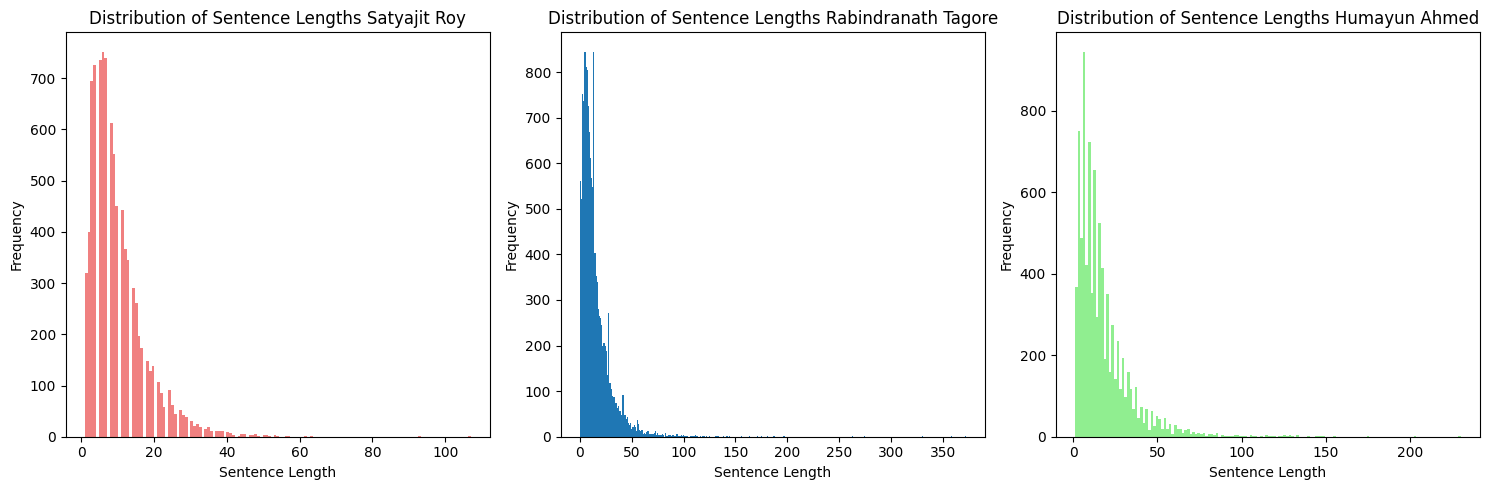

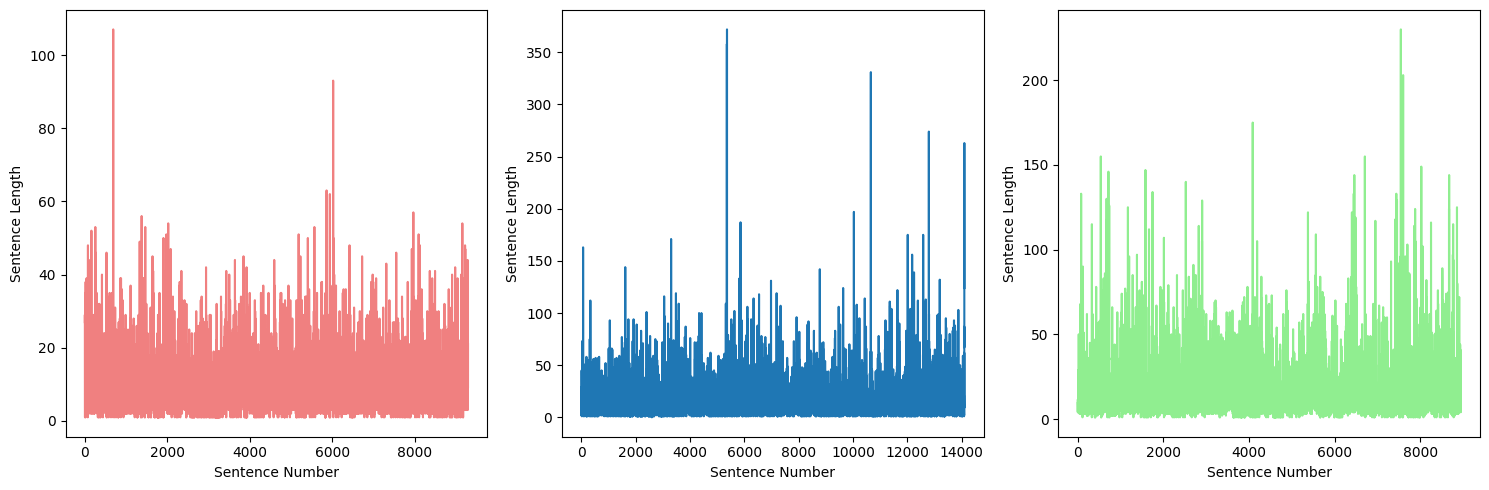

In [20]:
start = 2
end = start + 1
for i in range(start, end):
    path1 = f'/kaggle/working/Sentence/Histogram_{i}.png'
    path2 = f'/kaggle/working/Sentence/line_graph_{i}.png'
    sent1 = lenarr[i]
    sent2 = lenarr[i+1]
    sent3 = lenarr[i+2]
    plot_hist(sent1, sent2, sent3, save_path = path1)
    plot_lines(sent1, sent2, sent3, save_path = path2)

In [21]:
def bwp_outliers(numbers1, numbers2, numbers3, save_path = None):
    '''
    Compares three Subplots
    '''
    fig, ax = plt.subplots(figsize=(8, 4))  
    
    wid = 0.4
    boxplot1 = ax.boxplot(numbers1, vert=False, positions=[1], patch_artist=True, 
                          boxprops=dict(facecolor="lightcoral"), widths=wid, medianprops=dict(color="black"), showfliers=False)
    
    boxplot2 = ax.boxplot(numbers2, vert=False, positions=[2], patch_artist=True, 
                          boxprops=dict(facecolor=None), widths=wid, medianprops=dict(color="black"), showfliers=False)
    
    boxplot3 = ax.boxplot(numbers3, vert=False, positions=[3], patch_artist=True, 
                          boxprops=dict(facecolor="lightgreen"), widths=wid, medianprops=dict(color="black"), showfliers=False)

    ax.set_title("Comparison of Box-and-Whisker Plot")
    ax.set_xlabel("Sentence length")
    ax.set_yticks([1, 2, 3])
    ax.set_yticklabels(["S R", "R T", "H A"])
    ax.set_xlim([-5, 60])
    
    # Add legends
    ax.legend([boxplot1["boxes"][0], boxplot2["boxes"][0], boxplot3["boxes"][0]], 
              ["Satyajit Roy", "Rabindranath Tagore", "Humayun Ahmed"])

    plt.tight_layout()  # Adjust the layout to prevent overlapping
    if save_path:
        plt.savefig(save_path)
    plt.show()

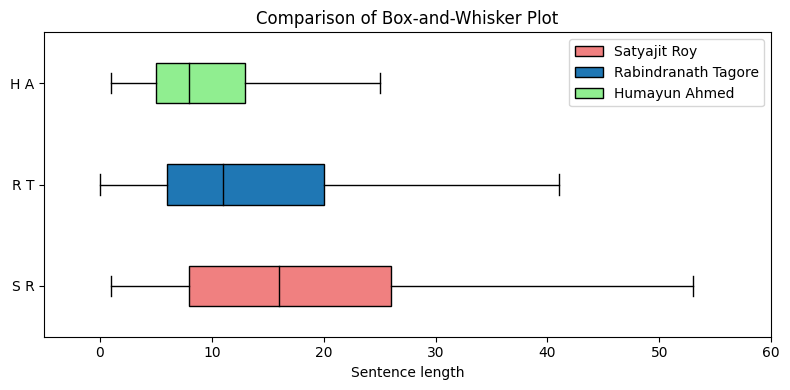

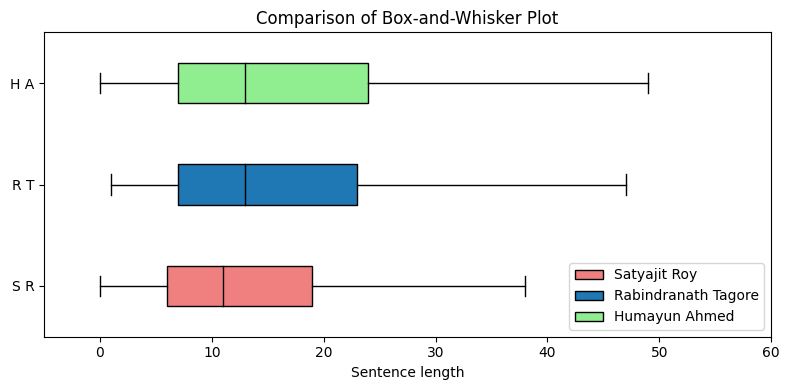

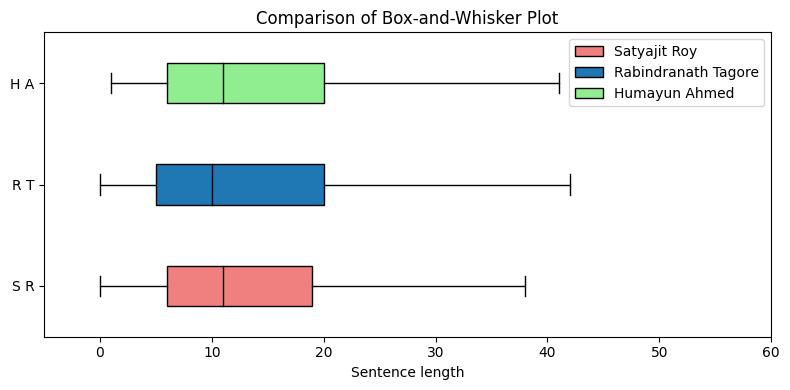

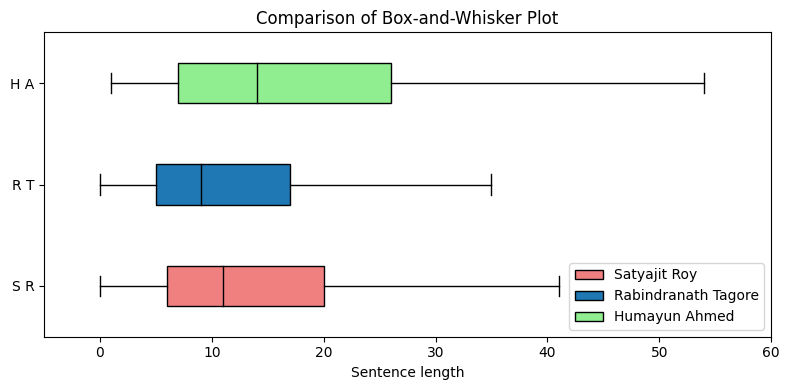

In [22]:
start = 0
end = start + 11
for i in range(start, end, 3):
    save_path = f'/kaggle/working/Sentence/Box_plot{i}.png'
    sent1 = lenarr[i]
    sent2 = lenarr[i+1]
    sent3 = lenarr[i+2]
    bwp_outliers(sent1, sent2, sent3, save_path=save_path)

In [23]:
def quartile(numbers):
    '''
    
    '''
    qarray = []
    # Calculate the Quartiles 
    for i in range(len(numbers)):
        quartiles = statistics.quantiles(numbers[i], n=4)
        qarray.append(quartiles)
    return qarray

In [24]:
qarr1 = quartile(lenarr)

In [25]:
qarr1

[[8.0, 16.0, 26.0],
 [6.0, 11.0, 20.0],
 [5.0, 8.0, 13.0],
 [6.0, 11.0, 19.0],
 [7.0, 13.0, 23.0],
 [7.0, 13.0, 24.0],
 [6.0, 11.0, 19.0],
 [5.0, 10.0, 20.0],
 [6.0, 11.0, 20.0],
 [6.0, 11.0, 20.0],
 [5.0, 9.0, 17.0],
 [7.0, 14.0, 26.0]]

In [26]:
def plot_3d_relation(*arrays, save_path = None):
    
    fig, axs = plt.subplots(1, len(arrays), figsize=(20, 6), subplot_kw={'projection': '3d'})
    
    tnames = ['Feluda Series Satyajit Ray', 'Novels of Rabindranath Tagore', 'Himu Series Humayun Ahmed']
    
    for i in range(len(arrays)):
        # Convert the input list of lists to a NumPy array
        data_array = np.array(arrays[i])
        # Extract x, y, and z coordinates from the array
        x = data_array[:, 0]
        y = data_array[:, 1]
        z = data_array[:, 2]

        # Create a 3D scatter plot with different markers for x, y, and z coordinates
        ax = axs[i]
        ax.scatter(x, y, z, c='b', marker='o', label='Q1', s=100)  # X Coordinate with circle marker
        ax.scatter(y, z, x, c='g', marker='^', label='Q2', s=100)  # Y Coordinate with triangle marker
        ax.scatter(z, x, y, c='r', marker='s', label='Q3', s=100)  # Z Coordinate with square marker

        # Set labels for x, y, and z axes
        ax.set_xlabel('Q1 Coordinate')
        ax.set_ylabel('Q2 Coordinate')
        ax.set_zlabel('Q3 Coordinate')

        # Set plot title and legend
        ax.set_title(f'{tnames[i]}')
        ax.legend()

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

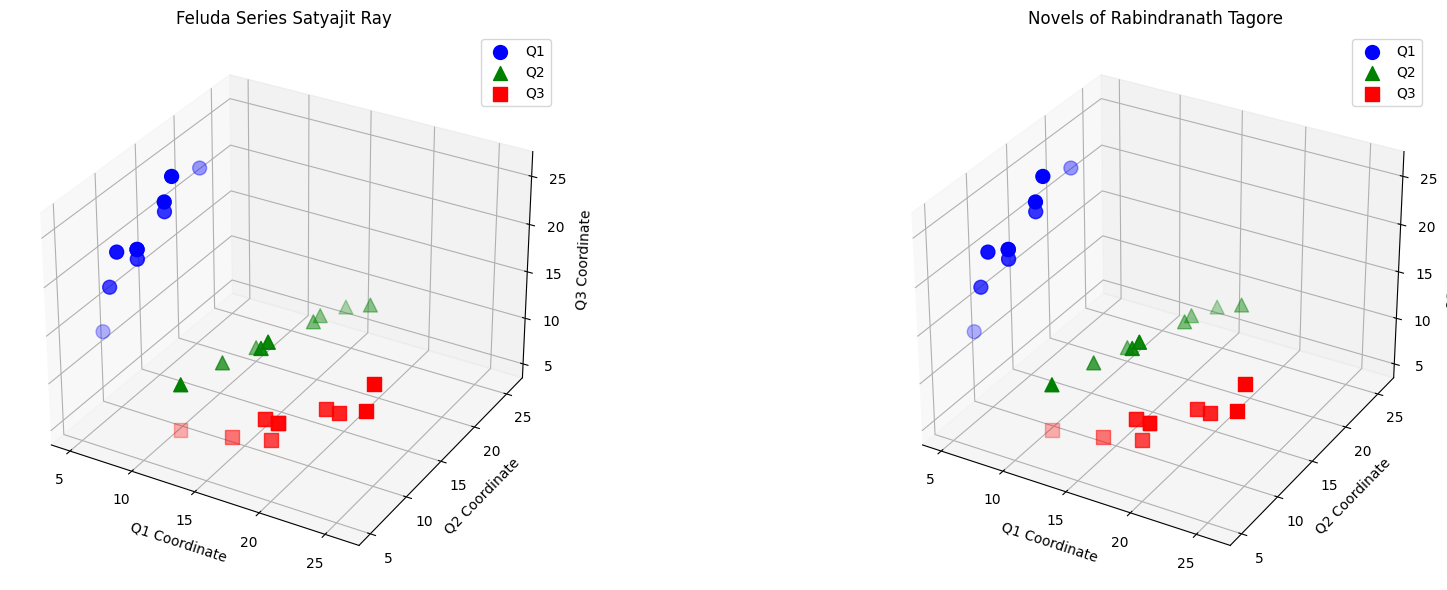

In [27]:
plot_3d_relation(qarr1, qarr1, save_path=None)

In [28]:
paths = []
for dirname, _, filenames in os.walk('/kaggle/input/english-book/Salman_Rushdie_Copy'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
paths

['/kaggle/input/english-book/Salman_Rushdie_Copy/2008 enchantress of florence.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/1999 ground beneath her feet.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/1975 Grimus.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/1981 Midnight_s Children.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/2005 Shalimar.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/1983 Shame.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/2001 Fury.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/1988 Satanic Verses.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/2017 the golden house.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/1995 moor_s last sigh.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/2019 Quichotte.txt',
 '/kaggle/input/english-book/Salman_Rushdie_Copy/2015 two years.txt']

In [29]:
lenarr[6][:5]

[35, 18, 5, 24, 5]

In [30]:
sentences[7][:7]

['‘To be born again’ sang Gibreel Farishta tumbling from the heavens ‘first you have to die',
 'Ho ji',
 'Ho ji',
 'To land upon the bosomy earth first one needs to fly',
 'Tattaa',
 'Takathun',
 'How to ever smile again if first you won’t cry']

In [31]:
test = lenarr[0]
len(test), max(test)

(5415, 183)

In [32]:
st, end = 60, 1000
count = sum(1 for val in test if st <= val <=end)
count

159

In [33]:
def catsentwo(x):
    '''
    Changes A length to an assumed category.
    '''
    if x <= 5:
        x = 0
    elif x <= 10:
        x = 1
    elif x <= 15:
        x = 2
    elif x <= 20:
        x = 3
    elif x <= 25:
        x = 4
    else:
        x = 5
    return x

In [34]:
def igenmatrix2(arr):
    '''
    Converts an array ready to be solved using Linear Algebra
    '''
    # Initialize a nxn array with zeros
    n = 6
    A = np.zeros((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catsentwo(rff[i])
        second_ind = catsentwo(rff[i+1])
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=2)
#     print(f'Matrix A = \n{rnd_A}')
    
    # Transpose of the matrix
    AT = rnd_A.T
    
    # Identity matrix
    identity_matrix = np.eye(n)

    # Subtract identity matrix from the transposed matrix
    ATI = AT - identity_matrix
    
    return ATI

def sentRank2(matrix):
    '''
    Returns the stationary matrix for a given Sentence length Array.
    '''
    # Create a new matrix with the last column replaced
    new_column = np.array([1, 1, 1, 1, 1, 1])
    modified_matrix = matrix.copy()
    modified_matrix[-1] = new_column
    #print(modified_matrix)
    
    # Right-hand side vector of the given equations
    b = np.array([0, 0, 0, 0, 0, 1])
    # Solve the system of equation now
    solution = np.linalg.solve(modified_matrix, b)
    solution = np.round(solution, decimals=2)
    
    return solution

def showA2(arr):
    '''
    Converts an array ready to be solved using Linear Algebra
    '''
    # Initialize a nxn array with zeros
    n = 6
    A = np.zeros((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catsentwo(rff[i])
        second_ind = catsentwo(rff[i+1])
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=2)
#     print(f'Matrix A = \n{rnd_A}')
    return rnd_A

In [35]:
test[:10]

[18, 54, 35, 9, 32, 22, 27, 18, 11, 18]

In [36]:
showA2(test)

array([[0.27, 0.3 , 0.12, 0.11, 0.07, 0.13],
       [0.15, 0.27, 0.18, 0.12, 0.09, 0.2 ],
       [0.1 , 0.24, 0.19, 0.15, 0.1 , 0.22],
       [0.07, 0.21, 0.17, 0.17, 0.1 , 0.27],
       [0.09, 0.2 , 0.15, 0.13, 0.14, 0.3 ],
       [0.07, 0.14, 0.15, 0.15, 0.12, 0.38]])

In [37]:
st_matArr1 = []
for i in range(len(lenarr)):
    st_matArr1.append(sentRank2(igenmatrix2(lenarr[i])))

In [38]:
import numpy as np

# Given transition matrix
transition_matrix = np.array([[0.16, 0.23, 0.13, 0.1 , 0.06, 0.32],
                              [0.09, 0.2 , 0.2 , 0.12, 0.07, 0.33],
                              [0.04, 0.14, 0.18, 0.12, 0.09, 0.43],
                              [0.04, 0.14, 0.12, 0.15, 0.13, 0.42],
                              [0.04, 0.12, 0.13, 0.13, 0.11, 0.48],
                              [0.03, 0.08, 0.11, 0.1 , 0.09, 0.6 ]])

# Solve for the stationary state using linear algebra
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
stationary_state = eigenvectors[:, np.argmax(np.isclose(eigenvalues, 1))].real
stationary_state /= stationary_state.sum()

print("Stationary State Vector:")
print(stationary_state)


Stationary State Vector:
[0.04617551 0.11874602 0.13293978 0.11262527 0.09193235 0.49758108]


In [39]:
st_matArr1

[array([0.12, 0.22, 0.16, 0.14, 0.1 , 0.26]),
 array([0.23, 0.25, 0.17, 0.12, 0.07, 0.16]),
 array([0.31, 0.33, 0.18, 0.09, 0.04, 0.04]),
 array([0.24, 0.26, 0.17, 0.11, 0.07, 0.16]),
 array([0.18, 0.23, 0.17, 0.12, 0.08, 0.22]),
 array([0.17, 0.23, 0.17, 0.12, 0.09, 0.22]),
 array([0.23, 0.26, 0.18, 0.12, 0.07, 0.15]),
 array([0.26, 0.26, 0.15, 0.1 , 0.07, 0.16]),
 array([0.25, 0.25, 0.15, 0.11, 0.07, 0.18]),
 array([0.22, 0.25, 0.17, 0.12, 0.07, 0.18]),
 array([0.28, 0.28, 0.16, 0.09, 0.06, 0.13]),
 array([0.17, 0.21, 0.15, 0.12, 0.08, 0.26])]

In [40]:
# Four states
def state_matrix(mat1, mat2, save_path = None):
    '''
    Plots Difference of The Heatmap of The State Matrix of Two different Writters. 
    '''
    # cmaps that i want to use
    cmaps = ['viridis', 'inferno', 'plasma', 'cividis']
    fig, axes = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'width_ratios': [1, 1, 1]})
    plt.subplots_adjust(wspace = .8) 
    im1 = axes[0].matshow(mat1, cmap=cmaps[1], vmin=0, vmax=1)
    axes[0].set_title('Humayun Ahmed')

    im2 = axes[1].matshow(mat2, cmap=cmaps[1], vmin=0, vmax=1)
    axes[1].set_title('Rabindranath Tagore')
    rownum = 4
#     # Add text annotations
    for i in range(rownum):
        for j in range(rownum):
            axes[0].text(j, i, f'{matrix1[i, j]:.2f}', ha="center", va="center", color="w")
            axes[1].text(j, i, f'{matrix2[i, j]:.2f}', ha="center", va="center", color="w")

    for ax in axes:
        ax.set_xticks(np.arange(rownum))
        ax.set_yticks(np.arange(rownum))
        ax.set_xticklabels(['x<=5', 'x<=10', 'x<=15', 'x>15'])
        ax.set_yticklabels(['x<=5', 'x<=10', 'x<=15', 'x>15'])
        ax.tick_params(axis='both', which='both', length=0)

    plt.tight_layout()
    plt.colorbar(im1, ax=axes)
    plt.show()
    

# Six States 
def state_matrix_two(mat1, mat2, mat3, cmi = 1, save_path = None):
    '''
    Plots Difference of The Heatmap of The State Matrix of Two different Writters. 
    '''
    # cmaps that i want to use
    cmaps = ['viridis', 'inferno', 'plasma', 'cividis']
    fig, axes = plt.subplots(1, 3, figsize=(19, 6), gridspec_kw={'width_ratios': [1, 1, 1]})
    plt.subplots_adjust(wspace = .8) 
    
    im1 = axes[0].matshow(mat1, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[0].set_title('Satyajit Ray')

    im2 = axes[1].matshow(mat2, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[1].set_title('Rabindranath Tagore')
    
    im3 = axes[2].matshow(mat3, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[2].set_title('Humayun Ahmed')
    
    rownum = 6
#     # Add text annotations
    for i in range(rownum):
        for j in range(rownum):
            axes[0].text(j, i, f'{matrix1[i, j]:.2f}', ha="center", va="center", color="w")
            axes[1].text(j, i, f'{matrix2[i, j]:.2f}', ha="center", va="center", color="w")
            axes[2].text(j, i, f'{matrix3[i, j]:.2f}', ha='center', va='center', color='w')

    for ax in axes:
        ax.set_xticks(np.arange(rownum))
        ax.set_yticks(np.arange(rownum))
        ax.set_xticklabels(['x<=3', 'x<=6', 'x<=9', 'x<=12', 'x<=15', 'x>15'])
        ax.set_yticklabels(['x<=3', 'x<=6', 'x<=9', 'x<=12', 'x<=15', 'x>15'])
        ax.tick_params(axis='both', which='both', length=0)

    plt.tight_layout()
    plt.colorbar(im1, ax=axes)
    if save_path:
        plt.savefig(save_path)
    plt.show()

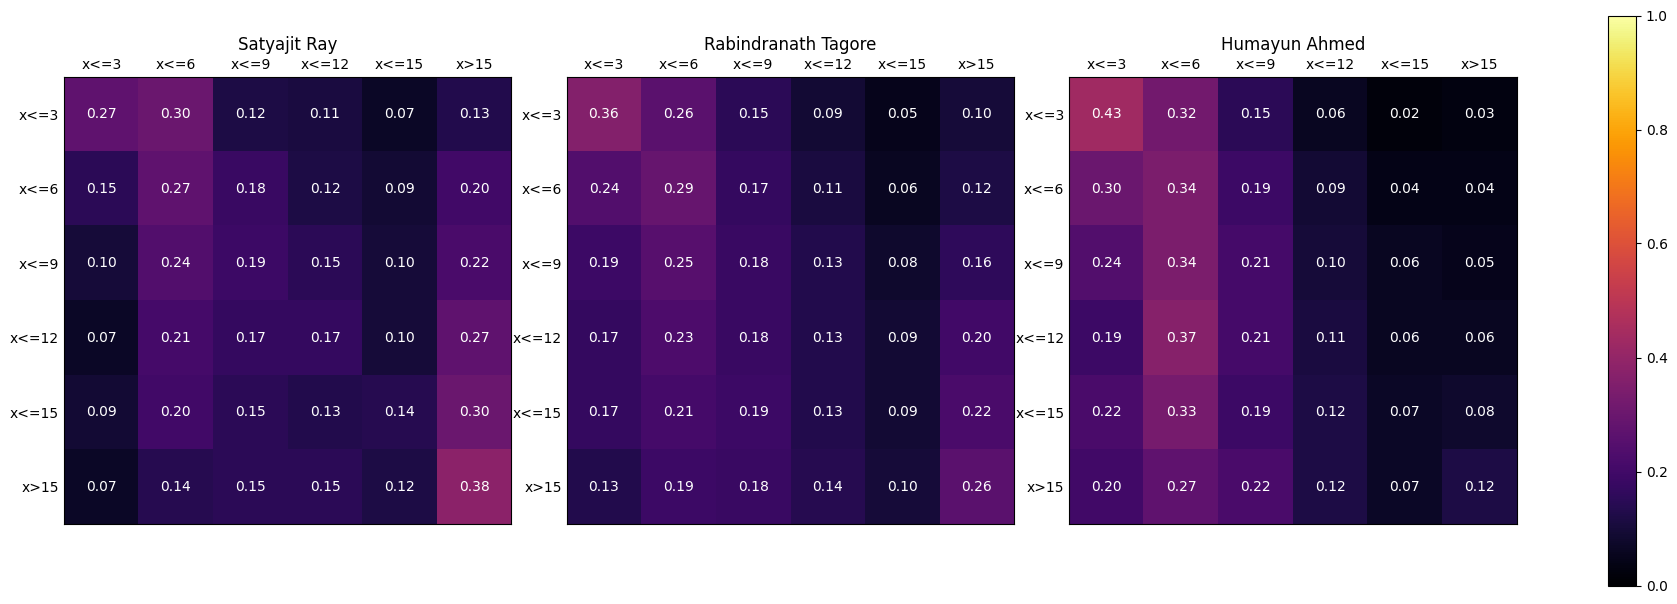

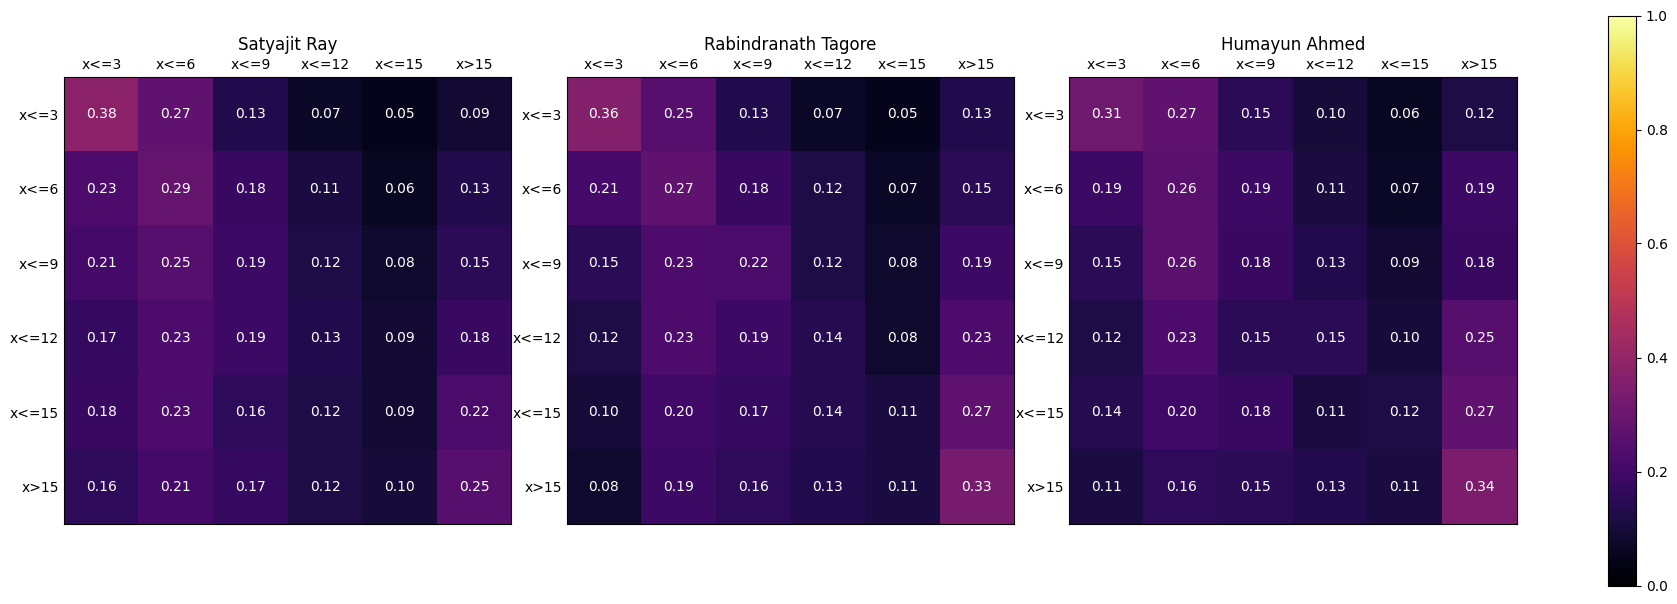

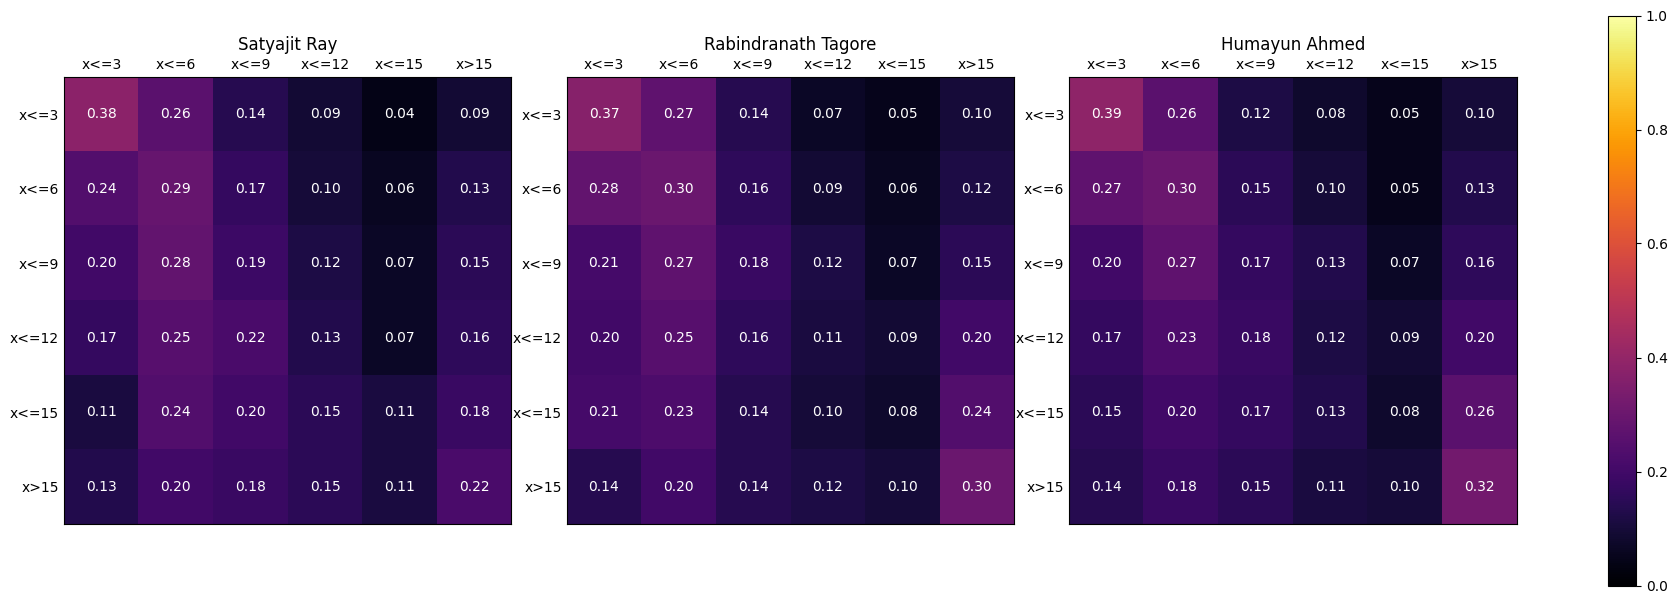

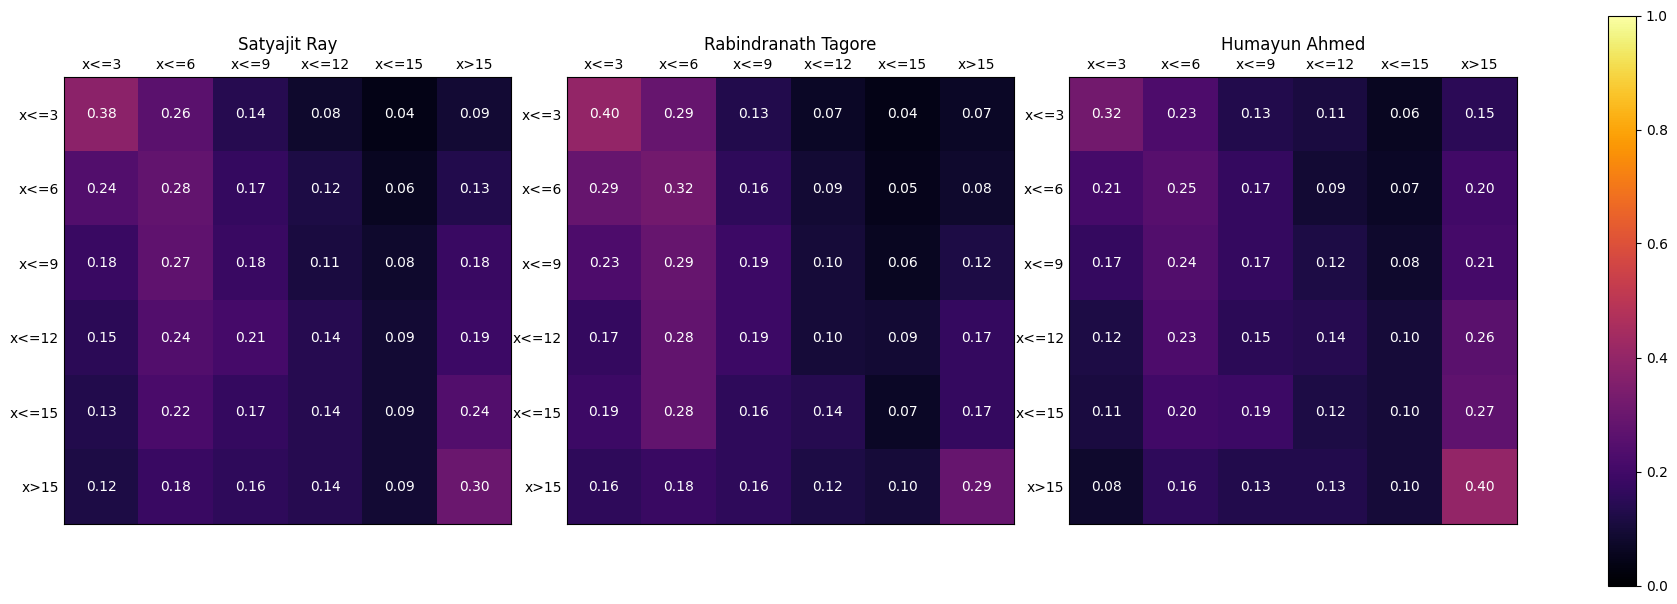

<---------------ENDED----------->


In [41]:
# N is the number of comparision you want to see
n = 12
for i in range(0, 12, 3):
    if i == 20:
        pass
    else:
        path = f'/kaggle/working/Sentence/output_matrix_{i}.png'
        matrix1 = showA2(lenarr[i])
        matrix2 = showA2(lenarr[i+1])
        matrix3 = showA2(lenarr[i+2])
        state_matrix_two(matrix1, matrix2, matrix3, cmi=1, save_path = path)
    
print('<---------------ENDED----------->')

In [42]:
showA2(lenarr[9])

array([[0.38, 0.26, 0.14, 0.08, 0.04, 0.09],
       [0.24, 0.28, 0.17, 0.12, 0.06, 0.13],
       [0.18, 0.27, 0.18, 0.11, 0.08, 0.18],
       [0.15, 0.24, 0.21, 0.14, 0.09, 0.19],
       [0.13, 0.22, 0.17, 0.14, 0.09, 0.24],
       [0.12, 0.18, 0.16, 0.14, 0.09, 0.3 ]])